In [16]:
# Import packages 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
import os 
os.chdir("/Users/ryantso/Desktop/RCC_Code")

In [18]:
# Create a reference dictionary to categorize the subtypes into their broader categories (organizing rows)
subtype_categories = ["RCC with clear cells",
                      "RCC with eosinophilic cells",
                      "Low-grade FH-deficient RCC",
                      "RCC with low-grade papillary lesion",
                      "RCC with high-grade papillary lesion",
                      "RCC with infiltrative pattern"]

RCC_CC = ["Clear cell RCC",
          "Multilocular cystic renal neoplasm of low malignant potential",
          "Clear cell papillary renal cell tumour w/ clear cell",
          "Papillary RCC w/ clear cell",
          "ELOC-mutated RCC / RCC with fibromyomatous stroma",
          "TFE3-rearranged RCC w/ clear cell"]

RCC_EC = ["Oncocytoma",
           "Chromophobe RCC",
           "Eosinophilic vacuolated tumour",
           "Eosinophilic solid and cystic RCC",
           "Low-grade oncocytic tumour",
           "TFEB-rearranged RCC",
           "Succinate dehydrogenase-deficient RCC"]

RCC_LGPL = ["Papillary RCC w/ low grade papillary",
            "Papillary renal neoplasm with reverse polarity",
            "Clear cell papillary renal cell tumour w/ low grade papillary",
            "Metanephric adenoma",
            "Mucinous tubular and spindle cell carcinoma"]

RCC_HGPL = ["Papillary RCC w/ high grade papillary",
            "Fumarate hydratase-deficient RCC",
            "TFE3-rearranged RCC w/ high grade papillary",
            "TFEB-amplified RCC",
            "Acquired Cystic Disease-Associated RCC",
            "Tubulocystic Carcinoma"]

RCC_IP = ["Collecting Duct Carcinoma",
            "SMARCB1-deficient Renal Medullary Carcinoma",
            "ALK-rearranged RCC",
            "Urothelial Carcinoma"]

# Organizing morphological features (columns)
feature_categories = ["Pattern","Cell Shape and Color","Nuclear Grade", "Cellular Feature", "Stroma", "Other Features"]

Pattern = ["Cystic",
           "Tubular",
           "Tubulocystic",
           "Cribriform/Adenocarcinoma-like",
           "Sieve-like with crystals",
           "Solid/Nested",
           "Papillary/Tubulopapillary",
           "Infiltrative"]

Cell_Shape_and_Color = ["Clear cells",
                        "Eosinophilic cells",
                        "Basophilic",
                        "Spindle Shaped"]

Nuclear_grade = ["Low","High"]

Cellular_Features = ["Inclusion-like nucleoli",
                    "Nuclei in reverse polarity",
                    "Raisinoid nuclei with perinuclear halo",
                    "Clear granular cytoplasm",
                    "Plant-like cell membrane",
                    "Basophilic stippling"]

Stroma = ["Thick fibromuscular stroma",
          "Desmoplastic stroma"]

Other_Features = ["Foamy macrophages",
                  "Mucin",
                  "Calcium oxalate crystals",
                  "End-stage renal disease background",
                  "True Necrosis"]

morphological_features = Pattern + Cell_Shape_and_Color + Nuclear_grade + Cellular_Features + Stroma + Other_Features

# Create list of Immunohistochemical Features 

IHC_features = ["PAX8", "CAIX", "CD10",	"CK7",	"AMACR",
                "CD117", "Vimentin", "TFE3", "Cathepsin K", "HMB45", 
                "Melan A", "FH", "2SC", "SDHB", "ALK", "SMARCB1 (INI1)",
                "OCT 3/4", "GATA3", "CK20", "CK-Pan" , "EMA", 
                "LMWCK", "WT1","CD57", "p63"] 
# IHC stains that were missing too much information 
NA_IHC_features = ["Ki67 labelling index (%)","PAX2", "ER", "PR", "S100"]

# create a dictionary to map subtypes to categories

metadata = {
    "Subtype Categories": subtype_categories,
    "RCC with Clear Cells": RCC_CC,
    "RCC with Eosinophilic Cells": RCC_EC,
    "RCC with Low-Grade Papillary Lesions": RCC_LGPL,
    "RCC with High-Grade Papillary Lesions": RCC_HGPL,
    "RCC with Infiltrative Pattern": RCC_IP,

    "Pattern": Pattern,
    "Cell Shape and Color": Cell_Shape_and_Color,
    "Nuclear Grade": Nuclear_grade,
    "Cellular Feature": Cellular_Features,
    "Stroma": Stroma,
    "Other Features": Other_Features}

In [19]:
# Priority IHC stains for specific subtypes (variable naming convnetion: subtype_prioritiy_IHC stains)

# Clear cell papillary renal cell tumour w/ clear cell
CC_PRCT_pri_IHC = ["CAIX", "CD10", "CK7", "AMACR", "GATA3"]

# Clear cell RCC
CC_RCC_pri_IHC = ["CAIX", "CD10", "CK7", "AMACR"]

# ELOC-mutated RCC / RCC with fibromyomatous stroma
ELOC_RCC_pri_IHC = ["CAIX", "CD10", "CK7", "AMACR", "GATA3"]

# Multilocular cystic renal neoplasm of low malignant potential
MCRN_LMP_pri_IHC = ["CAIX", "CD10", "CK7", "GATA3"]

# TFE3-rearranged RCC
TFE3_RRCC_pri_IHC = ["CAIX", "TFE3", "LMWCK", "CD10"]

# Papillary RCC
PRCC_pri_IHC = ["AMACR", "CK7", "CAIX", "LMWCK", "TFE3"]

In [20]:
# Select Reference 
# TO DO: Edit so that user inputs what they are looking for, which subtypes specifically and allow for interchange 

ref_morph_df = pd.read_csv("ref_sd_morph_rcc_2025.11.18.csv")

# Filter to include only RCC Clear Cell subtypes
CC_morph_df = ref_morph_df[ref_morph_df["Subtype"].isin(RCC_CC)]
CC_morph_df = CC_morph_df.drop(columns=["Category"])

# RCC with eosinophilic cells
EC_morph_df = ref_morph_df[ref_morph_df["Subtype"].isin(RCC_EC)]
EC_morph_df = EC_morph_df.drop(columns=["Category"])

# RCC with low-grade papillary lesion
LGPL_morph_df = ref_morph_df[ref_morph_df["Subtype"].isin(RCC_LGPL)]
LGPL_morph_df = LGPL_morph_df.drop(columns=["Category"])

# RCC with high-grade papillary lesion
HGPL_morph_df = ref_morph_df[ref_morph_df["Subtype"].isin(RCC_HGPL)]
HGPL_morph_df = HGPL_morph_df.drop(columns=["Category"])

# RCC with infiltrative pattern
IP_morph_df = ref_morph_df[ref_morph_df["Subtype"].isin(RCC_IP)]
IP_morph_df = IP_morph_df.drop(columns=["Category"])


# ----- Combined Morph and IHC Reference Dataset ------- 
ref_comb_df = pd.read_csv("ref_sd_comb_morph_ihc_2025.11.18.csv")

# Filter to include only RCC Clear Cell subtypes
CC_comb_df = ref_comb_df[ref_comb_df["Subtype"].isin(RCC_CC)]
CC_comb_df = CC_comb_df.drop(columns=["Ki67 labelling index (%)","PAX2","ER","PR","S100" ])

# RCC with eosinophilic cells
EC_comb_df = ref_comb_df[ref_comb_df["Subtype"].isin(RCC_EC)]
EC_comb_df = EC_comb_df.drop(columns=["Ki67 labelling index (%)","PAX2","ER","PR","S100" ])

# RCC with low-grade papillary lesion
LGPL_comb_df = ref_comb_df[ref_comb_df["Subtype"].isin(RCC_LGPL)]
LGPL_comb_df = LGPL_comb_df.drop(columns=["Ki67 labelling index (%)","PAX2","ER","PR","S100" ])

# RCC with high-grade papillary lesion
HGPL_comb_df = ref_comb_df[ref_comb_df["Subtype"].isin(RCC_HGPL)]
HGPL_comb_df = HGPL_comb_df.drop(columns=["Ki67 labelling index (%)","PAX2","ER","PR","S100" ])

# RCC with infiltrative pattern
IP_comb_df = ref_comb_df[ref_comb_df["Subtype"].isin(RCC_IP)]
IP_comb_df = IP_comb_df.drop(columns=["Ki67 labelling index (%)","PAX2","ER","PR","S100" ])

In [30]:
df = ref_comb_df

# A custom list of subtypes with priority IHC features 
subtypes_w_pri_IHC = ["Clear cell papillary renal cell tumour w/ clear cell", 
                      "Clear cell RCC",
                      "ELOC-mutated RCC / RCC with fibromyomatous stroma",
                      "Multilocular cystic renal neoplasm of low malignant potential",
                      "TFE3-rearranged RCC w/ high grade papillary",
                      "Papillary RCC w/ clear cell"]

# Create a dataframe, with the list of subtypes that have priority IHC feature information
filtered_df = df[df["Subtype"].isin(subtypes_w_pri_IHC)]

print(f"Filtered dataframe: {filtered_df.shape[0]} rows × {filtered_df.shape[1]} columns")
print(f"Subtypes filtered {filtered_df['Subtype'].value_counts()}")

print(f"Number of missing {filtered_df.isnull().sum()}")

filtered_df.isnull(True)

Filtered dataframe: 6 rows × 58 columns
Subtypes filtered Subtype
Clear cell RCC                                                   1
Multilocular cystic renal neoplasm of low malignant potential    1
Clear cell papillary renal cell tumour w/ clear cell             1
Papillary RCC w/ clear cell                                      1
ELOC-mutated RCC / RCC with fibromyomatous stroma                1
TFE3-rearranged RCC w/ high grade papillary                      1
Name: count, dtype: int64
Number of missing Subtype                                   0
Cystic                                    0
Tubular                                   0
Tubulocystic                              0
Cribriform/Adenocarcinoma-like            0
Sieve-like with crystals                  0
Solid/Nested                              0
Papillary/Tubulopapillary                 0
Infiltrative                              0
Clear                                     0
Eosinophilic                              0
Baso

TypeError: DataFrame.isnull() takes 1 positional argument but 2 were given

In [25]:
# Creating dataset for prioritizing morphological features first for subtypes with pathologist provided priority IHC stains
ref_morph_df = pd.read_csv("ref_sd_morph_rcc_2025.11.18.csv")
pri_morph_df = ref_morph_df.loc[
    (ref_morph_df["Subtype"].isin(subtypes_w_pri_IHC))
]
pri_morph_df = pri_morph_df.drop(columns="Category")
pri_morph_df.dtypes

Subtype                                    object
Cystic                                      int64
Tubular                                     int64
Tubulocystic                                int64
Cribriform/Adenocarcinoma-like              int64
Sieve-like with crystals                    int64
Solid/Nested                                int64
Papillary/Tubulopapillary                   int64
Infiltrative                                int64
Clear                                     float64
Eosinophilic                              float64
Basophilic                                float64
Spindle Shaped                              int64
Low                                         int64
High                                        int64
Inclusion-like nucleoli                     int64
Nuclei in reverse polarity                  int64
Raisinoid nuclei with perinuclear halo      int64
Clear granular cytoplasm                    int64
Plant-like  cell membrane                   int64


In [26]:
# df references the desired dataframe with specfiic subtypes that you want to study
# (Ensure to remove any other columns other than Subtype and Relevant Biomarkers)
# TO DO: Make this synthetic data generation into a function, that takes in size of population as input

# Set a seed for reproducibility
rng = np.random.default_rng(10)

df = pri_morph_df

# Create an empty DataFrame to hold synthetic patient data with the same columns as original
synthetic_df = pd.DataFrame(columns=df.columns)

# Get all biomarkers available, put them all into a list
biomarker_cols = []
for col in df.columns:
    if col not in ["Subtype"]:
        biomarker_cols.append(col)

# Loop through all the rows in the subtype biomarker spreadsheet 
for index, row in df.iterrows():
    # Select the specific subtype you are on now
    subtype = row["Subtype"]
    # desired population size - change for how many samples needed for each subtype
    n = 500

    # Create an empty dictionary to hold all biomarkers and their associated percent population (all the column information)
    biomarker_data = {}
    for biomarker in biomarker_cols:
        # Check if the value in the row is NaN
        if pd.isna(row[biomarker]):
            # If NaN, set the biomarker column to NaN values
            biomarker_data[biomarker] = [np.nan] * n
        else:
            # identify population prevalance of each biomarker
            prob_biomarker = row[biomarker]/100
            # When working with binomial generator, p must be less than 1 or greater than 0 (no Na)
            # Adding it to the biomarker data dicitionary as well 
            biomarker_data[biomarker] = rng.binomial(1, prob_biomarker, size=n)

    # Make the biomarker dictionary into a dataframe
    subtype_df = pd.DataFrame(biomarker_data)

    # Create Subtype Columna and add subtype name to each row
    subtype_df["Subtype"] = [subtype] * n

    synthetic_df = pd.concat([synthetic_df,subtype_df], ignore_index=True)

Best params: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV Accuracy: 0.79125
DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=6,
                       min_weight_fraction_leaf=0, random_state=42)

                                                               precision    recall  f1-score   support

                                               Clear cell RCC       1.00      0.56      0.72       100
         Clear cell papillary renal cell tumour w/ clear cell       1.00      1.00      1.00       100
            ELOC-mutated RCC / RCC with fibromyomatous stroma       1.00      1.00      1.00       100
Multilocular cystic renal neoplasm of low malignant potential       0.65      1.00      0.78       100
                                  Papillary RCC w/ clear cell       0.67      1.00      0.80       100
                  TFE3-rearranged RCC w/ high grade papillary       0.51      0.20      0.29       100

                      

<Figure size 1000x800 with 0 Axes>

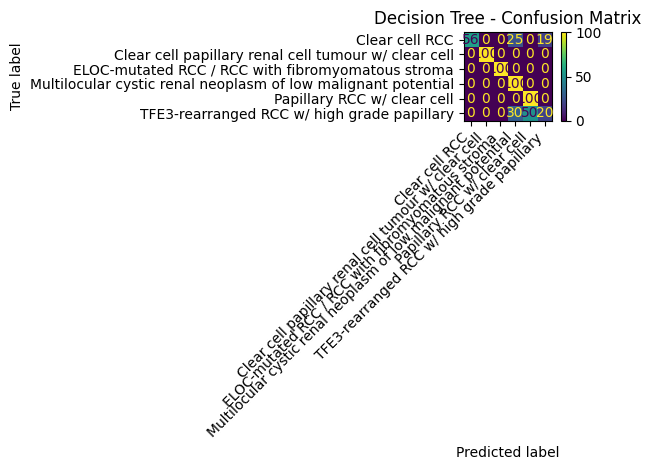

|--- Papillary/Tubulopapillary <= 0.50
|   |--- Clear granular cytoplasm <= 0.50
|   |   |--- Cystic <= 0.50
|   |   |   |--- class: TFE3-rearranged RCC w/ high grade papillary
|   |   |--- Cystic >  0.50
|   |   |   |--- class: Multilocular cystic renal neoplasm of low malignant potential
|   |--- Clear granular cytoplasm >  0.50
|   |   |--- class: Clear cell RCC
|--- Papillary/Tubulopapillary >  0.50
|   |--- Nuclei in reverse polarity <= 0.50
|   |   |--- Thick fibromuscular stroma <= 0.50
|   |   |   |--- class: Papillary RCC w/ clear cell
|   |   |--- Thick fibromuscular stroma >  0.50
|   |   |   |--- class: ELOC-mutated RCC / RCC with fibromyomatous stroma
|   |--- Nuclei in reverse polarity >  0.50
|   |   |--- class: Clear cell papillary renal cell tumour w/ clear cell



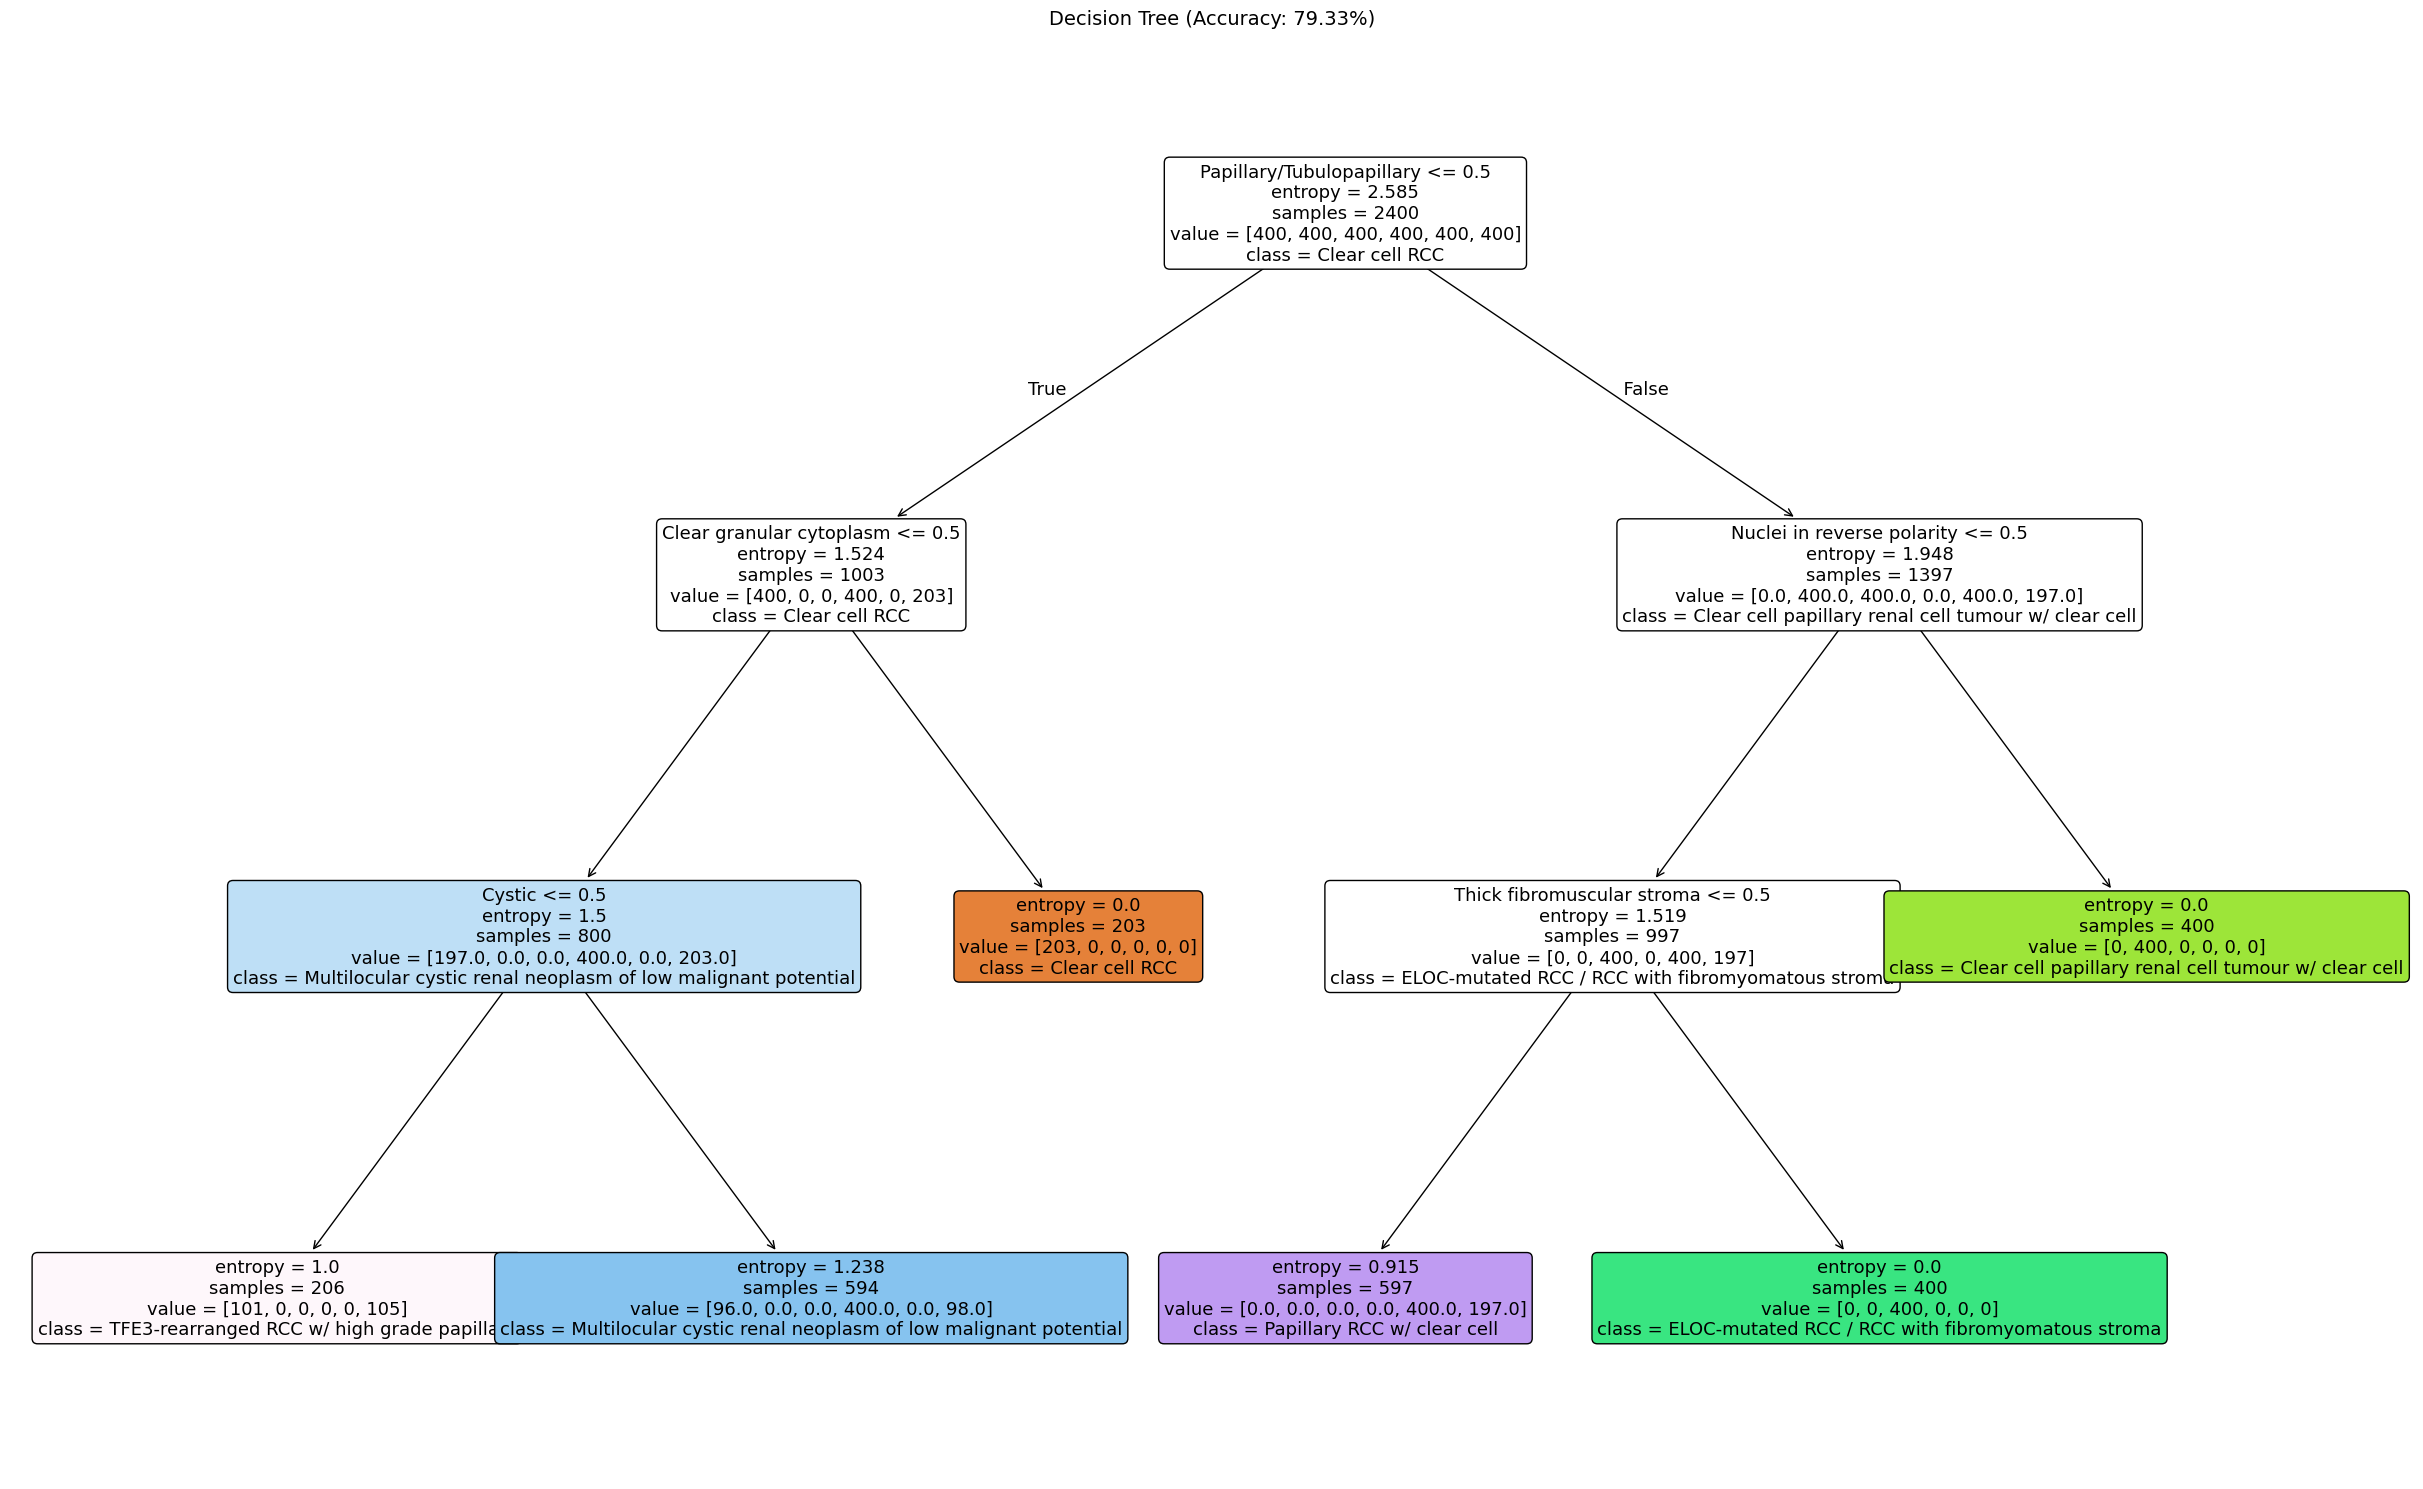

In [24]:
# Decision Tree Model (Simplified for binary data)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Load and prepare data
X = synthetic_df.drop(columns=["Subtype"]) 
y = synthetic_df["Subtype"] # target prediction
feature_names = X.columns.tolist()

# Split data into train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=8)
    # Stratify y makes sure target variable (lables) is evenly distributed in training and testing (useful for unbalanced datasets)

# Initialize Decsion Tree classifer 
tree = DecisionTreeClassifier(
    max_depth = 3,
    min_samples_split = 10, # minimum number required to split a node
    min_samples_leaf=1, # minimum samples rquired at a leaf node
    max_leaf_nodes = 6,
    criterion="gini",  # or "entropy" (log_loss in newer versions)
    random_state=42,
    class_weight=None,  # try "balanced" for skewed data
    min_weight_fraction_leaf=0,
    ccp_alpha=0.0 # controls pruning strength to reduce overfitting
)

# Hyperparameter tuning, GridSearch will test every comination 
param_grid = {
    "min_samples_leaf": [1, 5, 10, 20],
    "min_samples_split": [2, 10, 20],
    "criterion": ["entropy","gini"]
}

# Grid search to find the best combination of hyper-parameters to achieve hihg accuracy without overfitting
gs = GridSearchCV(tree, param_grid, scoring="accuracy", cv=5, n_jobs=-1)
    # n_jobs 
gs.fit(X_train, y_train)

print("Best params:", gs.best_params_)
print("Best CV Accuracy:", gs.best_score_)
print(gs.best_estimator_)

# Evaluate on test set
best_tree = gs.best_estimator_
pred = best_tree.predict(X_test)
print("\n" + classification_report(y_test, pred))

# Confusion Matrix
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay.from_predictions(y_test, pred)
plt.title("Decision Tree - Confusion Matrix")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print text representation of tree
print(export_text(best_tree, feature_names=feature_names, max_depth=3))

# Visualize the tree
class_names = np.unique(y_train).astype(str)

plt.figure(figsize=(25, 15))
plot_tree(best_tree, feature_names=feature_names, class_names=class_names,
          filled=True, rounded=True, fontsize=13, max_depth=5, proportion=False)
plt.title(f"Decision Tree (Accuracy: {best_tree.score(X_test, y_test):.2%})", fontsize=14)
plt.tight_layout()
plt.show()